In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint 

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# this was the original script to run
# from citipy import citipy

#from citipy import City
# generates NameError: name 'citipy' is not defined in the next cell
# or AttributeError: type object 'City' has no attribute 'nearest_city' if I change citipy.nearest_city to City.nearest_city

# I changed it to this based on the name in the citipy.py file
# from citipy import City

# below worked just by itself
import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    #city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

601

In [ ]:
# print(cities[0])

In [ ]:
# 6.2.6 Get the City Weather Data

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ff9a76e785acdd2347c882baae9c01b2


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
 # Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | oistins
Processing Record 2 of Set 13 | bengkulu
Processing Record 3 of Set 13 | codrington
Processing Record 4 of Set 13 | castro
Processing Record 5 of Set 13 | khatanga
Processing Record 6 of Set 13 | kapaa
Processing Record 7 of Set 13 | bluff
Processing Record 8 of Set 13 | longlac
City not found. Skipping...
Processing Record 9 of Set 13 | axim
Processing Record 10 of Set 13 | hambantota
Processing Record 11 of Set 13 | ushuaia
Processing Record 12 of Set 13 | korla
Processing Record 13 of Set 13 | lompoc
Processing Record 14 of Set 13 | punta arenas
Processing Record 15 of Set 13 | busselton
Processing Record 16 of Set 13 | sorvag
City not found. Skipping...
Processing Record 17 of Set 13 | barentsburg
City not found. Skipping...
Processing Record 18 of Set 13 | bogorodsk
Processing Record 19 of Set 13 | poso
Processing Record 20 of Set 13 | bentong
Processing Record 21 of Set 13 | rikite

Processing Record 32 of Set 16 | wasilla
Processing Record 33 of Set 16 | sangar
Processing Record 34 of Set 16 | amapa
Processing Record 35 of Set 16 | maningrida
Processing Record 36 of Set 16 | pisco
Processing Record 37 of Set 16 | ust-ishim
Processing Record 38 of Set 16 | nemuro
Processing Record 39 of Set 16 | san patricio
Processing Record 40 of Set 16 | talnakh
Processing Record 41 of Set 16 | bethel
Processing Record 42 of Set 16 | new norfolk
Processing Record 43 of Set 16 | general roca
Processing Record 44 of Set 16 | gizo
Processing Record 45 of Set 16 | ulladulla
Processing Record 46 of Set 16 | barrow
Processing Record 47 of Set 16 | estevan
Processing Record 48 of Set 16 | katobu
Processing Record 49 of Set 16 | pevek
Processing Record 50 of Set 16 | san vicente
Processing Record 1 of Set 17 | sassandra
Processing Record 2 of Set 17 | bluefield
Processing Record 3 of Set 17 | neuquen
Processing Record 4 of Set 17 | buala
Processing Record 5 of Set 17 | nhulunbuy
Proces

Processing Record 20 of Set 20 | norman wells
Processing Record 21 of Set 20 | arman
Processing Record 22 of Set 20 | midyat
Processing Record 23 of Set 20 | bubaque
Processing Record 24 of Set 20 | olinda
Processing Record 25 of Set 20 | hualmay
Processing Record 26 of Set 20 | tubuala
Processing Record 27 of Set 20 | makakilo city
Processing Record 28 of Set 20 | chuy
Processing Record 29 of Set 20 | saldanha
Processing Record 30 of Set 20 | carmen
Processing Record 31 of Set 20 | atagay
Processing Record 32 of Set 20 | dandong
Processing Record 33 of Set 20 | kassala
Processing Record 34 of Set 20 | louisbourg
City not found. Skipping...
Processing Record 35 of Set 20 | zlatoustovsk
City not found. Skipping...
Processing Record 36 of Set 20 | isangel
Processing Record 37 of Set 20 | honningsvag
Processing Record 38 of Set 20 | chapulhuacan
Processing Record 39 of Set 20 | marzuq
Processing Record 40 of Set 20 | riyadh
Processing Record 41 of Set 20 | aklavik
Processing Record 42 of 

Processing Record 6 of Set 24 | fevralsk
City not found. Skipping...
Processing Record 7 of Set 24 | hirara
Processing Record 8 of Set 24 | ballina
Processing Record 9 of Set 24 | la macarena
Processing Record 10 of Set 24 | araouane
Processing Record 11 of Set 24 | narodychi
Processing Record 12 of Set 24 | reinosa
Processing Record 13 of Set 24 | north tonawanda
Processing Record 14 of Set 24 | karaul
City not found. Skipping...
Processing Record 15 of Set 24 | samur
Processing Record 16 of Set 24 | puerto lempira
Processing Record 17 of Set 24 | cururupu
Processing Record 18 of Set 24 | ornskoldsvik
Processing Record 19 of Set 24 | nkhata bay
Processing Record 20 of Set 24 | teknaf
Processing Record 21 of Set 24 | lukaya
Processing Record 22 of Set 24 | sucua
Processing Record 23 of Set 24 | qaqortoq
Processing Record 24 of Set 24 | plettenberg bay
Processing Record 25 of Set 24 | itaituba
Processing Record 26 of Set 24 | fenoarivo atsinanana
Processing Record 27 of Set 24 | galiwin

In [ ]:
# 6.2.7 Create a DataFrame of City Weather Data

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Oistins,13.0667,-59.5333,79.43,58,30,22.21,BB,2022-02-11 18:04:42
1,Bengkulu,-3.8004,102.2655,74.89,88,87,4.59,ID,2022-02-11 18:04:43
2,Codrington,-38.2667,141.9667,54.45,84,11,8.57,AU,2022-02-11 18:04:43
3,Castro,-24.7911,-50.0119,80.19,45,0,2.26,BR,2022-02-11 18:04:43
4,Khatanga,71.9667,102.5000,2.44,82,96,16.20,RU,2022-02-11 18:04:44
5,Kapaa,22.0752,-159.3190,69.19,100,0,8.05,US,2022-02-11 18:04:44
6,Bluff,-46.6000,168.3333,52.81,69,61,13.85,NZ,2022-02-11 18:04:44
7,Axim,4.8699,-2.2405,81.81,77,18,9.51,GH,2022-02-11 18:04:45
8,Hambantota,6.1241,81.1185,77.27,87,99,12.75,LK,2022-02-11 18:04:45
9,Ushuaia,-54.8000,-68.3000,55.06,67,40,26.46,AR,2022-02-11 18:04:45


In [12]:
# reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
# to reorder the columns, we assign a variable to an array of the columns in the order we want them to appear
# new_column_order = ["column2", "column4", "column1"]
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
# we assign a new or the same DataFrame with new column order:
# df = df[new_column_order]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Oistins,BB,2022-02-11 18:04:42,13.0667,-59.5333,79.43,58,30,22.21
1,Bengkulu,ID,2022-02-11 18:04:43,-3.8004,102.2655,74.89,88,87,4.59
2,Codrington,AU,2022-02-11 18:04:43,-38.2667,141.9667,54.45,84,11,8.57
3,Castro,BR,2022-02-11 18:04:43,-24.7911,-50.0119,80.19,45,0,2.26
4,Khatanga,RU,2022-02-11 18:04:44,71.9667,102.5000,2.44,82,96,16.20
5,Kapaa,US,2022-02-11 18:04:44,22.0752,-159.3190,69.19,100,0,8.05
6,Bluff,NZ,2022-02-11 18:04:44,-46.6000,168.3333,52.81,69,61,13.85
7,Axim,GH,2022-02-11 18:04:45,4.8699,-2.2405,81.81,77,18,9.51
8,Hambantota,LK,2022-02-11 18:04:45,6.1241,81.1185,77.27,87,99,12.75
9,Ushuaia,AR,2022-02-11 18:04:45,-54.8000,-68.3000,55.06,67,40,26.46


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [ ]:
# 6.3.1 Plot Latitude vs. Temperature

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1644614002.6377692

In [17]:
today = time.strftime("%x")
today

'02/11/22'

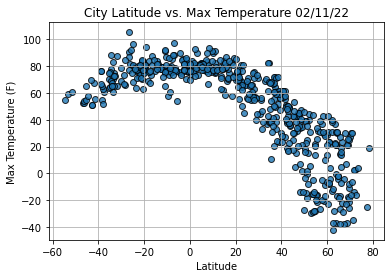

In [16]:
# create a scatter plot for the latitude vs. maximum temperature

# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [ ]:
# 6.3.2 Plot Lattitude vs. Humidity

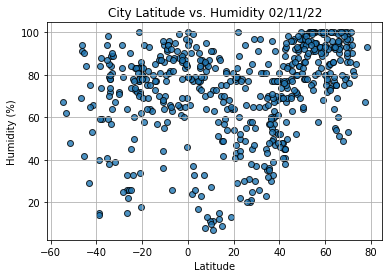

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

In [ ]:
# 6.3.3 Plot Latitude vs. Cloudiness

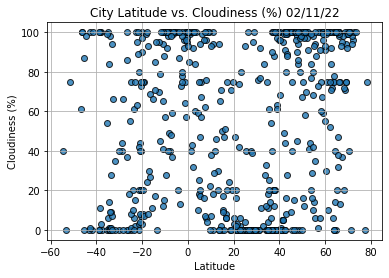

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [ ]:
# 6.3.4 Plot Latitude vs. Wind Speed

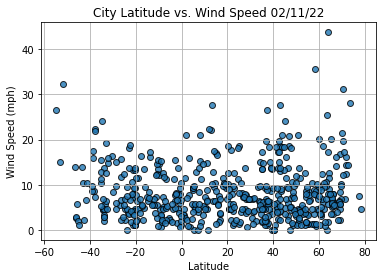

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()